논문에서 그린 박스플랏의 출처로 가능한 것은 아래와 같이 2가지 방식이 있으며 **두 방식의 결과는 각자 다르다**.

1. 타입별 데이터 갯수 X 100
2. 타입별 데이터 갯수

본 ipynb 파일이 박스플랏을 그리기 위해 사용하는 데이터는 2번 방식으로 구성되어 있다.


그러나 OREM 방법론은 두 가지 모두 가능한 상황이므로, 우리는 다음과 같은 선택을 할 수가 있다.

1. 기존 방법론(1) + OREM(1): (BEST) 기존 방법론들도 100개씩 데이터를 가지고 있어야만 한다.
2. 기존 방법론(1) + OREM(2): 임의로 더 나은 결과를 선택할 여지가 있는 불공정한 비교이다.
3. 기존 방법론(2) + OREM(1): 임의로 더 나은 결과를 선택할 여지가 있는 불공정한 비교이다.
4. 기존 방법론(2) + OREM(2): (2nd Best) 왜 이렇게 했을까 싶기는 하지만, 그래도 일단 공정한 비교라고는 할 수 있다.

즉, 본 ipynb 파일은 다양한 방법론 중에서 4번 방식으로 세팅된 데이터프레임에서 바로 그림을 그리고자 만들어졌다고 생각하면 된다.

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("..")

## Preprocess

In [74]:
# (# of data)*(# of methods, 7) 
type = "categorical"
cat = pd.read_excel("../data/"+type+".xlsx", header=1, index_col=0)
# Row: if dataframe does not have a length of 35 or 42, then we need to drop the empty rows.
# Col: if dataframe have more than 9(=3*3) columns, then we need to drop some of them.
cat.shape

(77, 10)

In [75]:
cat.dropna(inplace=True)
cat.drop("data_name", axis=1, inplace=True)

In [76]:
metric = ["Gmean", "F1", "AUC"]
clf = ["SVM", "RF", "NB"]  #한 번 더 확인 필요

newCol = []
for c in clf:
    newCol.append([m+"_"+c for m in metric])
newCol = [c for cols in newCol for c in cols]

cat.columns = newCol
print(cat.shape)
display(cat)

(35, 9)


,Gmean_SVM,F1_SVM,AUC_SVM,Gmean_RF,F1_RF,AUC_RF,Gmean_NB,F1_NB,AUC_NB
ROSE,0.574377,0.093301,0.628403,0.006358,0.068332,0.500101,0.000000,0.068320,0.500000
SMOTE,0.127559,0.038775,0.509986,0.005080,0.001270,0.500326,0.238614,0.071886,0.525882
ADASYN,0.126475,0.038034,0.509735,0.003810,0.000952,0.500242,0.233110,0.071777,0.525227
MWMOTE,0.092285,0.022893,0.505889,0.290259,0.110786,0.535520,0.370679,0.068226,0.522323
ROS,0.164255,0.055494,0.514448,0.103101,0.030875,0.508021,0.000486,0.068320,0.500006
RNR,0.665421,0.160636,0.678745,0.486931,0.148036,0.589839,0.690359,0.178105,0.701218
RNRvs,0.662466,0.146586,0.672199,0.606102,0.139823,0.634179,0.700211,0.148394,0.701568
ROSE,0.686830,0.164262,0.709268,0.501649,0.116252,0.593374,0.714231,0.184040,0.718942
SMOTE,0.440057,0.246245,0.588303,0.272358,0.128884,0.535964,0.681872,0.254182,0.699920
ADASYN,0.439415,0.246151,0.588097,0.302410,0.151583,0.543586,0.682971,0.250418,0.699842


In [77]:
cat.to_csv("../data/"+type+"_preprocessed.csv")

## Plot

In [132]:
cat.shape

(40, 9)

In [135]:
print(type)
display(cat.head(6))

mixed


,Gmean_SVM,F1_SVM,AUC_SVM,Gmean_RF,F1_RF,AUC_RF,Gmean_NB,F1_NB,AUC_NB
ADASYN,0.793450,0.602519,0.817313,0.914910,0.770916,0.917301,0.412424,0.127573,0.568720
ADASYN,0.742577,0.286464,0.744226,0.691818,0.286184,0.706315,0.487841,0.144478,0.598520
ADASYN,0.738646,0.314087,0.753430,0.552159,0.299321,0.642116,0.559847,0.125137,0.669736
ADASYN,0.812049,0.285993,0.819464,0.659994,0.317284,0.710612,0.653679,0.083649,0.656809
ADASYN,0.980544,0.959085,0.981117,0.972097,0.951935,0.972751,0.740282,0.382970,0.746258
MWMOTE,0.692093,0.225139,0.693694,0.721032,0.246532,0.722142,0.594425,0.162499,0.633327


In [126]:
type = "mixed"
cat = pd.read_csv("../data/"+type+"_preprocessed_AUC.csv", index_col=0)

metric = ["Gmean", "F1", "AUC"]
clf = ["SVM", "RF", "NB"]  #한 번 더 확인 필요

newCol = []
for c in clf:
    newCol.append([m+"_"+c for m in metric])
newCol = [c for cols in newCol for c in cols]

newMethods = ['ROSE', 'SMOTE', 'ADASYN', 'MWMOTE', 'ROS', 'OREM', 'RNR', 'RNRvs']

res = {}
for tmpCol in newCol:
    tmp = []
    for gb in cat[tmpCol].groupby(level=0):
        tmp.append(pd.Series(gb[-1].values, name=gb[0]))
    res[tmpCol] = pd.concat(tmp, axis=1)[newMethods]

[2, 5, 8]


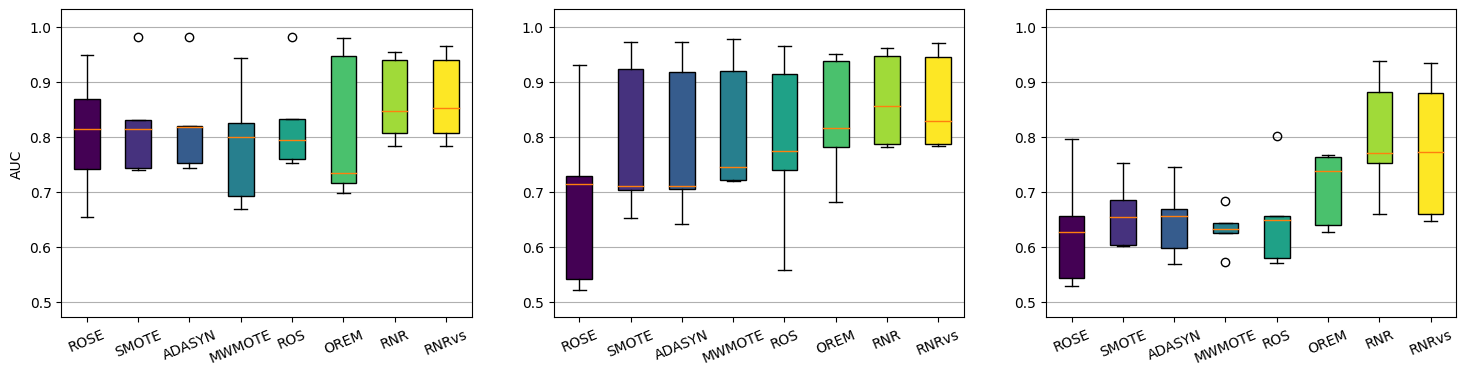

In [129]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

idx = 2
idx_li = [i*3 + idx for i in range(3)]; print(idx_li)

m_c = [res[list(res.keys())[i]] for i in idx_li]  # method and classifier
bplot1 = ax1.boxplot(
    m_c[0], labels=newMethods, patch_artist=True
)
bplot2 = ax2.boxplot(
    m_c[1], labels=newMethods, patch_artist=True
)
bplot3 = ax3.boxplot(
    m_c[2], labels=newMethods, patch_artist=True
)
if idx == 0:
    ax1.set_ylabel('Gmean')
    ax1.set_title("Support Vector Machine")
    ax2.set_title("Random Forest")
    ax3.set_title("Naive Bayes")
elif idx == 1:
    ax1.set_ylabel('F1 Score')
else:
    ax1.set_ylabel('AUC')

ax1.set_xticklabels(newMethods, rotation = 22.5)
ax2.set_xticklabels(newMethods, rotation = 22.5)
ax3.set_xticklabels(newMethods, rotation = 22.5)
ax1.set_ylim(
    min([res[list(res.keys())[i]].min().min() for i in idx_li])-0.05, 
    max([res[list(res.keys())[i]].max().max() for i in idx_li])+0.05
)

ax2.set_ylim(
    min([res[list(res.keys())[i]].min().min() for i in idx_li])-0.05, 
    max([res[list(res.keys())[i]].max().max() for i in idx_li])+0.05
)

ax3.set_ylim(
    min([res[list(res.keys())[i]].min().min() for i in idx_li])-0.05, 
    max([res[list(res.keys())[i]].max().max() for i in idx_li])+0.05
)
for ax in [ax1, ax2, ax3]:
    ax.yaxis.grid(True)
colors = plt.get_cmap('viridis').resampled(len(newMethods)).colors

for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)